## JSON File contents
1) _via_settings has the settings of via annotator such as box color, Project details, _via_img_metadata in the form of a dictinary with filename followed by filesize as index, list of filenames with file sizes, version etc.,

2) Required data of annotation is available in _via_img_metadata.    
     
3) Contents of _via_img_metadata are filename, size, regions which contains details of Boundary box starting indexes as x,y and height and width of boundary box with classes as region attributes

In [53]:
import pandas as pd
# import numpy as np
import math
import json
import os
dogs_json = open('/home/jai/Documents/TSAI-EVA40-Assignments/Session 12/Assignemnt 12.json')
dogs_json = json.load(dogs_json)
dogs_json

{'_via_settings': {'ui': {'annotation_editor_height': 25,
   'annotation_editor_fontsize': 0.8,
   'leftsidebar_width': 18,
   'image_grid': {'img_height': 80,
    'rshape_fill': 'none',
    'rshape_fill_opacity': 0.3,
    'rshape_stroke': 'yellow',
    'rshape_stroke_width': 2,
    'show_region_shape': True,
    'show_image_policy': 'all'},
   'image': {'region_label': '__via_region_id__',
    'region_color': '__via_default_region_color__',
    'region_label_font': '10px Sans',
    'on_image_annotation_editor_placement': 'NEAR_REGION'}},
  'core': {'buffer_size': 18, 'filepath': {}, 'default_filepath': ''},
  'project': {'name': 'Assignemnt 12'}},
 '_via_img_metadata': {'_104191893_kukurtihar_papputhedog_-pappu_the_pug_nepal.png1719216': {'filename': '_104191893_kukurtihar_papputhedog_-pappu_the_pug_nepal.png',
   'size': 1719216,
   'regions': [{'shape_attributes': {'name': 'rect',
      'x': 210,
      'y': 3,
      'width': 781,
      'height': 558},
     'region_attributes': {'Cla

In [50]:
req = dogs_json['_via_img_metadata']
req = pd.DataFrame(req.items())
dogs_oths = pd.DataFrame(columns = ['Image Name',
                                    'Shape Name',
                                    'BB x','BB y',
                                    'BB width',
                                    'BB height',
                                    'Class'])

n =0 
i,j = 0,0
for i in range(0,req.shape[0]):
    for j in range(0,len(req.iloc[i,1]['regions'])):
        dogs_oths.loc[n,'Image Name'] = req.iloc[i,1]['filename']
        dogs_oths.loc[n,'Shape Name'] = req.iloc[i,1]['regions'][j]['shape_attributes']['name']
        dogs_oths.loc[n,'BB x'] = req.iloc[i,1]['regions'][j]['shape_attributes']['x']
        dogs_oths.loc[n,'BB y'] = req.iloc[i,1]['regions'][j]['shape_attributes']['y']
        dogs_oths.loc[n,'BB width'] = req.iloc[i,1]['regions'][j]['shape_attributes']['width']
        dogs_oths.loc[n,'BB height'] = req.iloc[i,1]['regions'][j]['shape_attributes']['height']
        dogs_oths.loc[n,'Class'] = req.iloc[i,1]['regions'][j]['region_attributes']['Class']
        n +=1
        # print(n)

dogs_oths.head()

,Image Name,Shape Name,BB x,BB y,BB width,BB height,Class
0,_104191893_kukurtihar_papputhedog_-pappu_the_p...,rect,210,3,781,558,Dog
1,4a2add44-2e03-41a8-ba02-722c8044d711-VPC_GOLDE...,rect,542,9,865,1064,Dog
2,4a2add44-2e03-41a8-ba02-722c8044d711-VPC_GOLDE...,rect,692,592,281,311,Ball
3,4a2add44-2e03-41a8-ba02-722c8044d711-VPC_GOLDE...,rect,805,777,309,238,Ball
4,4a2add44-2e03-41a8-ba02-722c8044d711-VPC_GOLDE...,rect,1094,660,243,148,Ball


In [51]:
os.chdir(r'/home/jai/Documents/TSAI-EVA40-Assignments/Session 12/Dogs')
os.listdir()

data = pd.DataFrame({'Image Name':os.listdir()})
data['Image width'] = 0
data['Image height'] = 0
import PIL
from PIL import Image

for i in os.listdir():
    image = PIL.Image.open(i)
    # print(image.size)
    sers = (data['Image Name'] == i)
    data.loc[sers,'Image width'], data.loc[sers,'Image height'] = image.size
    
dogs_oths = pd.merge(dogs_oths,data, how = 'left',on = 'Image Name')


## Finding Centroids
dogs_oths['BBx Cx'] = dogs_oths['BB x'] + (dogs_oths['BB width']/2)
dogs_oths['BBy Cy'] = dogs_oths['BB y'] + (dogs_oths['BB height']/2)
dogs_oths.head()

,Image Name,Shape Name,BB x,BB y,BB width,BB height,Class,Image width,Image height,BBx Cx,BBy Cy
0,_104191893_kukurtihar_papputhedog_-pappu_the_p...,rect,210,3,781,558,Dog,1024,576,600.5,282
1,4a2add44-2e03-41a8-ba02-722c8044d711-VPC_GOLDE...,rect,542,9,865,1064,Dog,1920,1080,974.5,541
2,4a2add44-2e03-41a8-ba02-722c8044d711-VPC_GOLDE...,rect,692,592,281,311,Ball,1920,1080,832.5,747.5
3,4a2add44-2e03-41a8-ba02-722c8044d711-VPC_GOLDE...,rect,805,777,309,238,Ball,1920,1080,959.5,896
4,4a2add44-2e03-41a8-ba02-722c8044d711-VPC_GOLDE...,rect,1094,660,243,148,Ball,1920,1080,1215.5,734


In [48]:
final = dogs_oths.copy()
final['N width'] = final['Image width']/final['Image width']
final['N height'] = final['Image height']/final['Image height']

final['N BB width'] = final['BB width']/final['Image width']
final['N BB height'] = final['BB height']/final['Image height']

final['N BBx Cx'] = (final['BBx Cx']/(final['Image width']/13)).apply(lambda x:math.ceil(x))
final['N BBy Cy'] = (final['BBy Cy']/(final['Image height']/13)).apply(lambda x:math.ceil(x))
final.head()

,Image Name,Shape Name,BB x,BB y,BB width,BB height,Class,Image width,Image height,BBx Cx,BBy Cy,N width,N height,N BB width,N BB height,N BBx Cx,N BBy Cy
0,_104191893_kukurtihar_papputhedog_-pappu_the_p...,rect,210,3,781,558,Dog,1024,576,600.5,282,1.0,1.0,0.762695,0.96875,8,7
1,4a2add44-2e03-41a8-ba02-722c8044d711-VPC_GOLDE...,rect,542,9,865,1064,Dog,1920,1080,974.5,541,1.0,1.0,0.450521,0.985185,7,7
2,4a2add44-2e03-41a8-ba02-722c8044d711-VPC_GOLDE...,rect,692,592,281,311,Ball,1920,1080,832.5,747.5,1.0,1.0,0.146354,0.287963,6,9
3,4a2add44-2e03-41a8-ba02-722c8044d711-VPC_GOLDE...,rect,805,777,309,238,Ball,1920,1080,959.5,896,1.0,1.0,0.160938,0.22037,7,11
4,4a2add44-2e03-41a8-ba02-722c8044d711-VPC_GOLDE...,rect,1094,660,243,148,Ball,1920,1080,1215.5,734,1.0,1.0,0.126562,0.137037,9,9


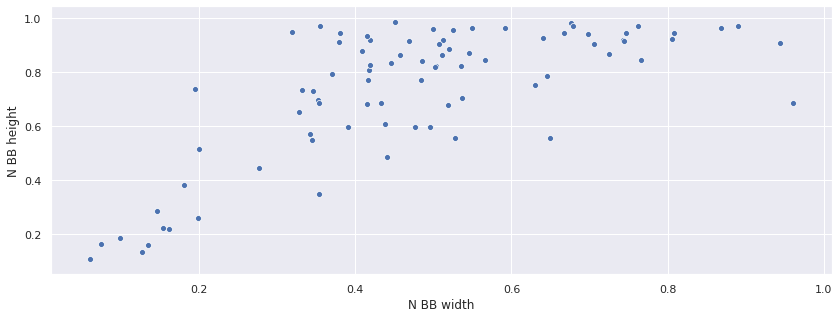

In [28]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14,4.93)})
sns.scatterplot(x=final['N BB width'], y=final['N BB height'])

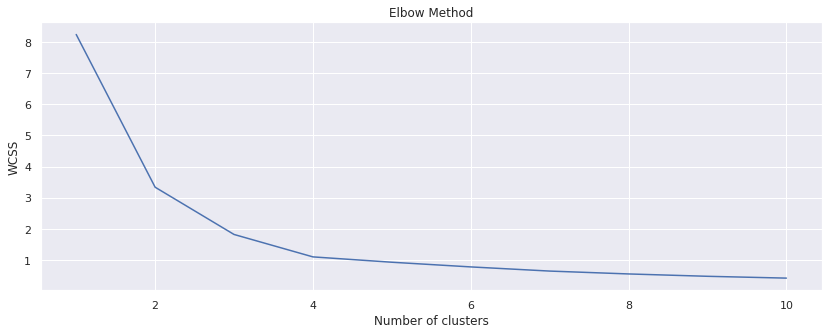

In [39]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(final[['N BB width','N BB height']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

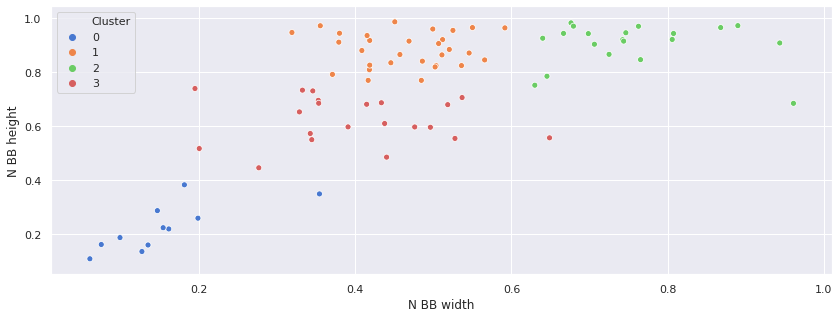

In [43]:
X = final[['N BB width','N BB height']]
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
final['Cluster'] = kmeans.fit_predict(X)
sns.scatterplot(x=final['N BB width'], y=final['N BB height'],hue = final['Cluster'],
                palette = "muted")